In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
df = pd.read_csv('/content/final_bn_data.csv')

#Get shape and head
df.shape
df.head(10)

,category,headline,content,label
0,National,৮ দিনে ১৮ বিল পাস!,দশম জাতীয় সংসদের মেয়াদ শেষ হয়ে যাচ্ছে। কার্যত ...,0.0
1,Sports,আ’লীগের জনসভায় লোকে লোকারণ্য ফেনী ট্রাংক রোড,একাদশ জাতীয় সংসদ নির্বাচনকে সামনে রেখে সাংগঠনি...,0.0
2,National,মাদ্রাসায় জোড়া খুন: পরিচালক তিন দিনের রিমান্ডে,গাজীপুরে জোড়া খুন মামলার প্রধান আসামি মাদ্রাসা...,0.0
3,Sports,নেপালকে হারিয়ে গ্রুপ চ্যাম্পিয়ন বাংলাদেশ,সাফ অনূর্ধ্ব-১৮ নারী ফুটবল চ্যাম্পিয়নশিপে নেপা...,1.0
4,National,কুড়িগ্রামে ২ শিক্ষার্থীর লাশ উদ্ধার,কুড়িগ্রাম প্রতিনিধি : কুড়িগ্রাম সদর উপজেলার বে...,1.0
5,National,মেহেরপুরে দ্বিতীয় শ্রেণির দুই ছাত্রীকে ধর্ষনের...,মেহেরপুর সদর উপজেলার কুতুবপুর গ্রামে দ্বিতীয় শ...,1.0
6,Finance,সিলভা ফার্মায় ২৮ টাকা মুনাফা পেলেন বিনিয়োগকারীরা,ঢাকা: পুঁজিবাজারে লেনদেনের প্রথম কার্যদিবসে সি...,1.0
7,Entertainment,এবারেও ঈদে গান শোনাবেন মাহফুজুর রহমান!,এবারের ঈদেও টেলিভিশনের পর্দায় গান গাইবেন ড. ম...,0.0
8,Editorial,প্রথম কার্যদিবসেই ৭৫২ কোটি টাকার প্রকল্পে স্বা...,প্রথম কর্মদিবসে ৭৫২ কোটি টাকার উন্নয়ন প্রকল্পে...,1.0
9,Sports,চার গোল করেও খুশি নন এমবাপ্পে!,পিএসজি জিতেছে ৫-০ গোলে। লিওঁর বিপক্ষে এই ম্যাচ...,1.0


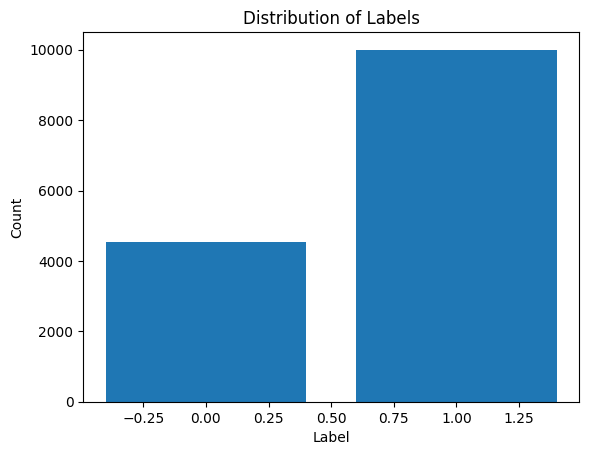

In [ ]:
labels = df.label.value_counts()
plt.bar(labels.index, labels.values)
plt.title("Distribution of Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['label'], test_size=0.2, random_state=42)

In [ ]:
# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
# Train and test the Decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_tfidf, y_train)
y_pred_dtc = dtc.predict(X_test_tfidf)
print('Accuracy score (Decision tree):', accuracy_score(y_test, y_pred_dtc))
print('Confusion matrix (Decision tree):\n', confusion_matrix(y_test, y_pred_dtc))
print('Classification report (Decision tree):\n', classification_report(y_test, y_pred_dtc))

Accuracy score (Decision tree): 0.6736588720770289
Confusion matrix (Decision tree):
 [[ 444  502]
 [ 447 1515]]
Classification report (Decision tree):
               precision    recall  f1-score   support

         0.0       0.50      0.47      0.48       946
         1.0       0.75      0.77      0.76      1962

    accuracy                           0.67      2908
   macro avg       0.62      0.62      0.62      2908
weighted avg       0.67      0.67      0.67      2908



In [ ]:
# Train and test the SVM classifier
svm = SVC()
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)
print('Accuracy score (SVM):', accuracy_score(y_test, y_pred_svm))
print('Confusion matrix (SVM):\n', confusion_matrix(y_test, y_pred_svm))
print('Classification report (SVM):\n', classification_report(y_test, y_pred_svm))

Accuracy score (SVM): 0.7506877579092159
Confusion matrix (SVM):
 [[ 349  597]
 [ 128 1834]]
Classification report (SVM):
               precision    recall  f1-score   support

         0.0       0.73      0.37      0.49       946
         1.0       0.75      0.93      0.83      1962

    accuracy                           0.75      2908
   macro avg       0.74      0.65      0.66      2908
weighted avg       0.75      0.75      0.72      2908



In [ ]:

# Train and test the Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)
print('Accuracy score (Naive Bayes):', accuracy_score(y_test, y_pred_nb))
print('Confusion matrix (Naive Bayes):\n', confusion_matrix(y_test, y_pred_nb))
print('Classification report (Naive Bayes):\n', classification_report(y_test, y_pred_nb))

Accuracy score (Naive Bayes): 0.6936038514442916
Confusion matrix (Naive Bayes):
 [[  60  886]
 [   5 1957]]
Classification report (Naive Bayes):
               precision    recall  f1-score   support

         0.0       0.92      0.06      0.12       946
         1.0       0.69      1.00      0.81      1962

    accuracy                           0.69      2908
   macro avg       0.81      0.53      0.47      2908
weighted avg       0.76      0.69      0.59      2908



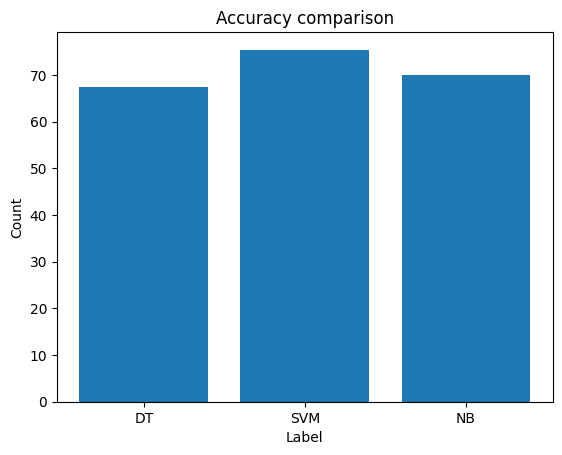

In [ ]:
#labels = df.label.value_counts()
plt.bar(["DT", "SVM", "NB"], [67.43, 75.43, 69.98])
plt.title("Accuracy comparison")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()